# 27 그래프의 표현과 정의

### 27.1 그래프란?

앞선 내용을 통해 선형으로 표현하기 힘든 계층 구조를 표현하기 위해 고안된 트리에 대해 배웠다. **그래프란 계층적인 구조보다 좀더 일반적이고 강력한 자료구조**이다.

우리는 현실 세계의 수많은 문제들을 푸는데 그래프(Graph)를 유용하게 사용할 수 있다.

- 현실 세계의 사물이나 추상적인 개념 간의 연결 관계를 표현
- G(V,E)로 표현하는 자료구조 
- 어떤 자료나 개념을 표현하는 정점(Vertex)의 집합 V
- 정점들을 연결하는 간선(Edge)의 집합 E

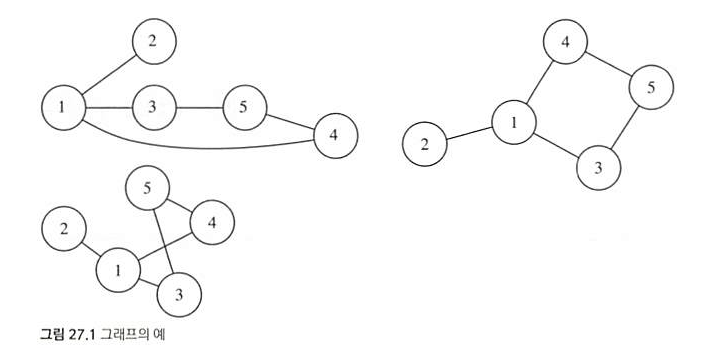

### 그래프의 종류

그래프의 정의는 비교적 간단하지만, 이를 표현하는 대상에 따라 여러 변형된 형태를 가진다. 

예를들어 정점이나 간선에 추가적인 속성을 부여할 수 있고, 존재할 수 있는 간선이나 정점의 형태에 제약을 두기도 한다. 이렇듯 그래프는 다양한 종류의 형태를 가진다.

> **방향 그래프 / 유향 그래프(Directed Graph)** 는 각 간선이 방향이라는 새로운 속성을 가지는 것을 말한다. 이는 사람들 간의 짝사랑 관계, 도로망에서의 일방 통행 등을 표현하는데 사용될 수 있다. 이와 반대로 간선에 방향이 없는 경우는 **무향 그래프(Undirected Graph)** 라고 한다.

> **가중치 그래프(Weighted Graph)** 는 각 간선에 가중치라고 불리는 실수 속성을 부여한다. 이는 사람간의 호감도, 환율 등 다양한 정보를 표현하는 데 사용된다. 

>**다중 그래프**란 두 정점 사이에 두 개 이상의 간선이 있을 수 있는 그래프를 의미한다,

> **(루트 없는)트리(Unrooted tree)** 는 연결 관계만 보면 트리와 동일한 자료구조를 가지는 무향 그래프를 의미한다. 즉, 두 정점을 잇는 방법이 딱 한가지만 존재하는 것이다.

> **이분 그래프(Bipartite Graph)** 는 겹치지 않는 두 개의 그룹으로 나눠서 서로 다른 그룹에 속한 정점들 간에만 간선이 존재하는 경우를 말한다. 

> **Dag** 는 사이클 없는 방향 그래프로, 방향 그래프이지만 한 점에서 출발해 자기 자신으로 돌아오는 경로(사이클)이 존재하지 않는 경우를 의미한다.


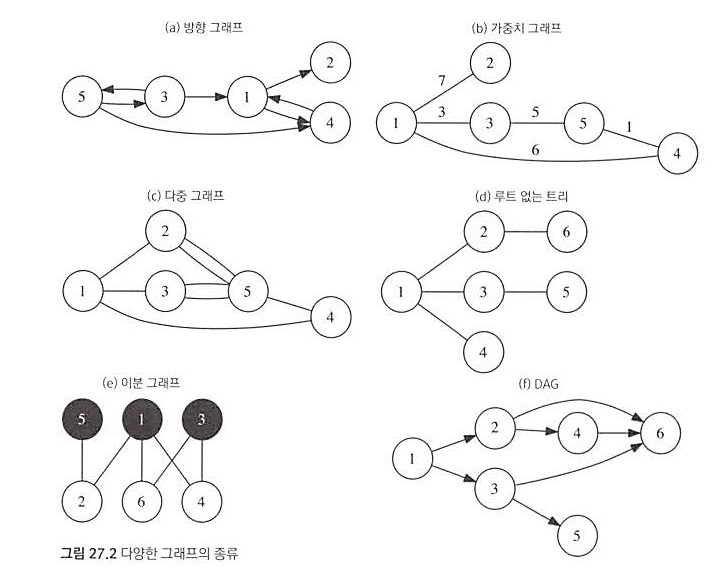

### 그래프의 경로

그래프에서 가장 중요한 개념 중 하나가 **경로(Path)** 이다. 경로란 끝과 끝이 서로 연결된 간선들을 순서대로 나열한 것이다. 

아래와 같은 예시에서 (1,2), (2,3), (3,4), (4,5)는 끝과 끝이 이어진 간선들이므로 하나의 경로를 이룬다.

경로 중 한 정점을 최대 한 번만 지나는 경로를 **단순 경로(Simple Path)** 라고 부른다. 대부분, 그래프 이론에서의 경로는 이러한 단순 경로를 의미하며, 단순 경로가 아니라면 별도로 이 사실을 명시하곤 한다.

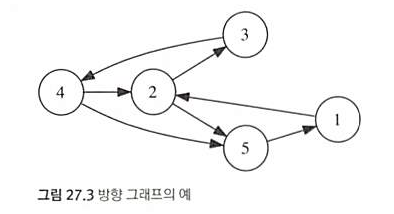

### 27.2 그래프의 표현 방법

그래프는 보통 트리에 비해 훨씬 정적인 용도로 사용된다. 즉 새로운 정점이나 간선을 추가하고 삭제하는 일이 잦 일어나지 않는것을 믜한다. 그래의 표현 방식은 간선의 정보를 어떤 식으로 저장하느냐에 따라 크게 두 가지로 나뉜다. 

> **인접 리스트 표현** 은 그래프의 각 정점마다 해당 정점에서 각 정점에서 연결 리스트를 갖는 방식으로 구현된다.만약 가중치 그래프 등 간선이 추가적 속성을 갖는 그래프를 표현하는 경우에는 구조체로 표현한다. 

> **인접 행렬 표현** 앞선 방법은 두 정점이 주어질 때 연결되어 잇는 지를 알기 위해서는 연결 리스트를 일일이 뒤져야 한다는 단점이 존재한다. 인정 행렬 표현은 2차언 배열을 이용하여 그래프의 간선 정보를 저장하므로 간단하게 표현한다. 가중치 그래프를 표현한다면 간선의 정보를 Boolen이 아닌 정수나 실수의 변수로 설정하게 된다(간선이 없는 경우에는 -1 혹은 아주 큰 값으로 설정)

이와 같은 표현은 각각의 장단점을 가진다.
1. 인접 행렬 표현은 두 정점을 잇는 간선이 있는지를 한 번의 배열 접근만으로 확인할 수 있다.
2. 반면 이는 2차원 배열을 사용하기에 실제 간선이 훨씬 적다면 비효율적인 메모리 공간을 사용하게 된다.
3. 인접 리스트 표현은 이와 반대로, 실제로 사용하는 간선만큼 메모리가 사용된다는 장점을 가진다.


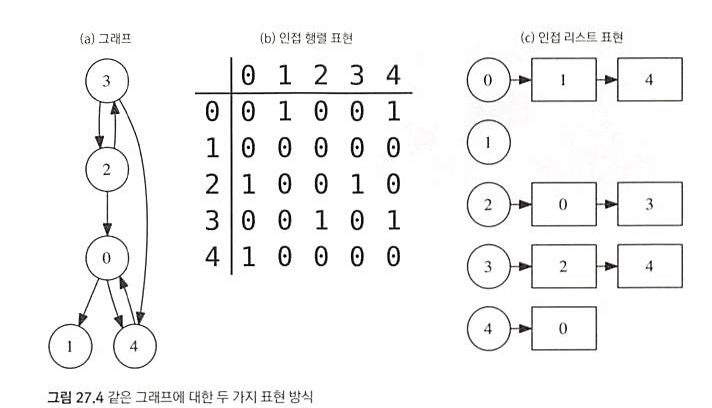

# 28 그래프의 깊이 우선 탐색

### 28.1 그래프의 우선 탐색 이란?

그래프의 모든 정점들을 특정한 순서에 방문하는 알고리즘을 **그래프의 탐색(Search)알고리즘** 이라고 한다. 그래프는 구조가 복잡하기 때문에 탐색 과정에서 얻는 정보가 매우 중요한데, 탐색 알고리즘 중 가장 널리 사용되는 두 가지가 1. 깊이 우선 탐색과 2. 너비 우선 탐색이다.

> 깊이 우선 탐색(Depth-First Search, DFS)는 그래프의 모든 정점을 발견하는 가장 고전적인 방법이다. 현재 정점과 인접한 간선들을 하나씩 검사하다가, 아직 방문하지 않는 정점으로 향하는 간선이 있으면 무조건 따라가는 것이다. 이 과정에서 더이상 갈 곳이 없는 막힌 정멈에 도달한다면 마지막에 따라왔던 간선을 따라 뒤로 돌아간다.


즉, 깊이 우선 탐색은 탐색의 각 과정에서 **가능한 한 그래프의 안으로 '깊이' 들어가려고 시도** 한다. 

아래는 깊이 우선 탐색의 예로, 실선 화살표는 깊이 우선 탐색이 따라가는 간선이고 점선 화살표는 더 이상 갈 정점이 없어서 뒤로 돌아가는 경우이며, 화살표가 없는 점선은 탐색 과정에서 따라가지 않은 간선을 보여준다.
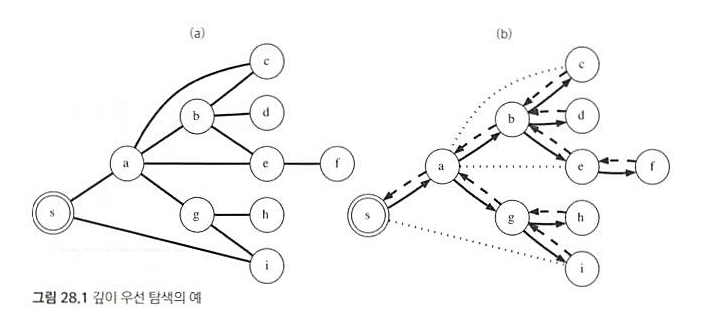

### 깊이 우선 탐색의 시간 복잡도

깊이 우선 탐색의 시간 복잡도는 어떤 그래프 표현 방식을 사용하느냐에 따라 달라진다. 

**인접 리스트**를 사용해 그래프를 표현하는 경우 Dfs() 함수는 한 정점마다 한 번씩 호출되고, dfs() 한 번의 수행 시간은 모든 인접 간선을 검사하는 for문에 의해 지배된다. 따라서, 깊이 우선 탐색의 시간 복잡도는 **O(|V|+|E|)** 이다.

**인접 행렬**을 사용하는 경우에도 Dfs()의 호출 횟수는 |V|이다. 다만 각 함수에서 내부는 모든 다른 정점을 순회하면서 간선의 여부를 확인하기 때문에 한 번의 실행에 O(|V|) 시간이 든다. 따라서 깊이 탐색의 시간 복잡도는  **O(|V|^2)** 이다. 

### 깊이 우선 탐색을 통한 예시 (위상 정렬)

위상 정렬은 의존성이 잇는 작업들이 주어질 때, 이들을 어떤 순서로 수행해야 하는지 계산해 준다. 예를 들어 김치찌개를 끓이기 위해서는 다음들과 같은 작업들을 해야한다(순서 없이).

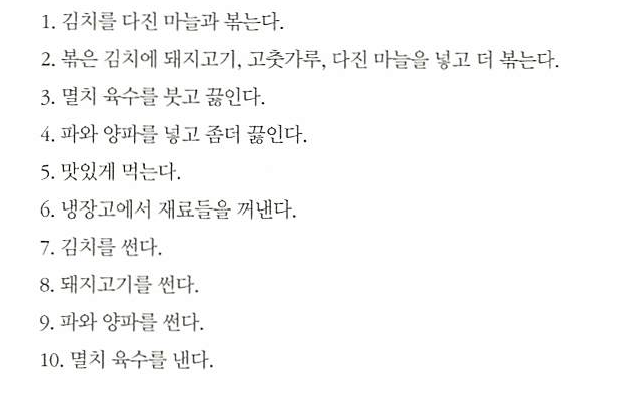

중요한 점은 각 작업들은 순서가 있다는 것이다. 예를 들어 3번 작업에서 멸치 육수를 붓기 위해서는 10번의 작업이 반드시 선행되어야 한다는 것이다. 그래프 이론에서 각 작업을 정점으로, 작업 간의 의존 관계를 간선으로 표현한 방향 그래프를 **의존성 그래프** 라고 한다. 

의존성 그래프의 특징은 그래프에 사이클이 없는 Dag 이라는 점이다,

의존성 그래프의 정점들을 일렬로 늘어놓고, 왼쪽에서부터 하나씩 수행할 때 모든 의존성이 만족되려면 모든 간선들이 왼쪽에서 오른쪽으로 가야한다.

이러한 DAG의 정점을 배열하는 문제를 **위상 정렬(Topological Sort)** 라고 한다. 

모든 정점들에 대해서 Dfs를 수행하는 함수를 DfsAll()로 했을 때 이를 통해 해결할 수 있다. **DfsAll()이 종료한 뒤 기록된 순서를 뒤집으면 위상 정렬 결과를 얻을 수 있다** 이는 다음과 같다. 

u에서 v로 가는 간선 (u,v)이 있다고 가정하자.
1. Dfs(u)를 완료하기 전에 dfs(v)이 먼저 수행되지 않은 경우에는 v는 u의 왼쪽에 있을 수 없다(왼쪽에서 오른쪽으로 간다고 가정)

2. 반대로, Dfs(v)이 먼저 수행되었다고 하는 경우, 이는 Dfs(v)에서 재귀 호출을 거쳐 Dfs(u)가 호출되어야 하는데 이는 그래프에서 v에서 u로 가는 경로의 존재를 의미한다. 이는 그래프가 가지는 **DAG** 라는 속성을 위반하는 사이클이 되므로 존재할 수 없다.

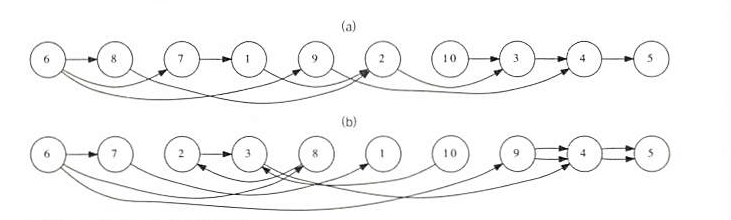

### 28.2-3 고대어 사전:

**문제**

아마추어 고고학자인 일리노이 존스는 시카고 근교에서 고대 문명의 흔적을 찾아냈습니다. 그 흔적 중에는 이 언어의 사전도 포함되어 있었는데, 이 사전에 포함된 단어들은 모두 영어의 소문자 알파벳으로 구성되어 있었지만 사전에 포함된 단어의 순서들이 영어와 서로 달랐습니다. 발굴팀은 단어들이 사전 순이 아닌 다른 순서대로 정렬되어 있는지, 아니면 알파벳들의 순서가 영어와 서로 다른 것인지를 알고 싶어합니다.

예를 들어 다섯 개의 단어 gg, kia, lotte, lg, hanhwa 가 사전에 순서대로 적혀 있다고 합시다. gg가 kia보다 앞에 오려면 이 언어에서는 g가 k보다 앞에 와야 합니다. 같은 원리로 k는 l앞에, l은 h앞에 와야 한다는 것을 알 수 있지요. lotte 가 lg 보다 앞에 오려면 o가 g 보다 앞에 와야 한다는 것도 알 수 있습니다. 이들을 종합하면 다섯 개의 알파벳 o, g, k, l, h 의 상대적 순서를 알게 됩니다.

사전에 포함된 단어들의 목록이 순서대로 주어질 때 이 언어에서 알파벳의 순서를 계산하는 프로그램을 작성하세요.

**입력**

>입력의 첫 줄에는 테스트 케이스의 수 C (1 <= C <= 50) 가 주어집니다. 각 테스트 케이스의 첫 줄에는 사전에 포함된 단어의 수 N (1 <= N <= 1000) 이 주어집니다. 그 후 N 줄에 하나씩 사전에 포함된 단어가 순서대로 주어집니다. 각 단어는 알파벳 소문자로 구성되어 있으며, 길이는 1 이상 20 이하입니다. 중복으로 출현하는 단어는 없습니다.

**출력**
>각 테스트 케이스마다 한 줄을 출력합니다. 만약 알파벳들의 순서에 모순이 있다면 "INVALID HYPOTHESIS"를 출력하고, 모순이 없다면 26개의 소문자로 알파벳들의 순서를 출력합니다. 만약 가능한 순서가 여러 개 있다면 아무 것이나 출력해도 좋습니다.

In [181]:
import numpy as np
import string 
def makeGraph(words):
    """
    알파벳의 각 글자에 대한 인접 행렬
    간선(i,j)는 알파벳 i가 j보다 앞에 와야 함을 나타낸다.
    """
    alphabet = string.ascii_lowercase
    adj = np.zeros((26,26),dtype=int)
    for j in range(1,len(words)):
        i = j-1; length = min(len(words[i]),len(words[j]))
        # i가 j보다 한칸 칸 앞에 온 문자열
        # 모든 문자열에서 일치하지 않으면 26*26 행렬에서
        # 각 위치에 해당하는 간선을 1로 표시
        for k in range(length):
            if words[i][k] != words[j][k]: 
                a = alphabet.index(words[i][k]) 
                b = alphabet.index(words[j][k]) 
                adj[a][b] = int(1)
                break
    return adj

In [ ]:
[0,0] =aa

In [251]:
a = ['gg','kia','lotte','lg','hanwha']
sum(makeGraph(a))

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [233]:
def dfs(here):
    """
    here이라는 시작노드에서 dfs를 재귀적으로 하고
    순서가 저장된 Order에 원소를 추가하는 함수
    """
    seen[here] = 1
    for there in range(len(adj)):
        if (adj[here][there]== 1):
            dfs(there)
        else:
            continue
        if here not in order:
            order.append(here)
        # 먼저 수행된 dfs를 order에 저장
        if there not in order:
            order_back.append(there)
        # 나중에 수행된 dfs를 order_back에 저장
        # 젤 마지막에서 수행된(순서상 젤 마지막)에 있는 원소를 
        #추가하기 위함
        

In [249]:
def topologicalSort(words):
    answer = []
    global adj
    adj = makeGraph(words)
    # words에 기본 Graph를 설정
    # 인접행렬 방법으로 [i,j]=1이면 인덱스 i가 j보다 먼저 온다는 뜻
    m = len(adj)
    global seen; global order; global order_back;
    # 글로벌 함수로 지정하기
    seen = np.zeros(m)
    # 지나친 정점을 저장하기 위한 배열
    order = []
    # dfs가 수행된 순서를 저장
    order_back = []
    # 젤 마지막에 수행된 원소를 저장하기 위해서 새로운 배열 추가
    for i in range(m):
        if seen[i] == 0:
            dfs(i)
    order = order[::-1]
    # 위상정렬을 위해 dfs 순서를 뒤집음
    order.append(order_back[-1])
    # 젤 마지막 원소를 추가
    nodata = [a if a not in order else "" for a in np.arange(len(adj))]
    # 알파벳 인덱스(0~25)에서 order에 없는 원소를 차례대로 추가
    order.extend(nodata)
    while '' in order:
        order.remove('')
        # '' 원소 삭제
    for value in order:
        answer.append(string.ascii_lowercase[value])
    # 해당 인덱스에 해당하는 알파벳을 저장
    return ''.join(answer)

In [250]:
a = ['gg','kia','lotte','lg','hanwha']
topologicalSort(a)

'ogklhabcdefijmnpqrstuvwxyz'

### 28.4 오일러 서킷

**오일러 서킷** 이란 그래프의 모든 간선을 정확히 한 번씩 지나서 시작점으로 돌아오는 경로를 말한다. 시작점으로 돌아오기 때문에 서킷은 사이클임을 알 수 있다 = **한 붓 그리기**

**오일러 서킷/경로 존재 조건**
오일러 서킷은 모든 정점에 들어가는 횟수와 나오는 횟수가 같아야 하기 때문에 모든 정점들이 **짝수**이어야만 오일러 서킷이 존재할 수 있다.

그렇다면 역으로, 모든 정점이 짝수점이라면 오일러 서킷은 항상 존재할까?(하나의 컴포터넌트임을 가정)

1. 임의의 정점 u에서 시작해 아직 따라가지 않은 간선 중 하나를 따라가며 임의의 경로를 만드는 함수를 findRandomCircuit(u)라고 하자.그래프의 모든 정점은 짝수이므로 이 함수는 항상 서킷이 된다. 운 좋게도 이 서킷이 모든 간선을 지나쳤으면 **오일러 서킷**이 된다.

2. 그렇지 않은 경우에는 아직 따라가지 않은 간선과 인접해 있는 정점을 찾아서 다시 함수를 수행하고 또 하나의 서킷을 얻는다. 

3. 최종적으로는 두 서킷을 합쳐서 최종적인 서킷을 구한다. '

간단한 예시는 아래와 같다. 각 단계에서 실선으로 표시된 사이클을 얻었다고 하자.

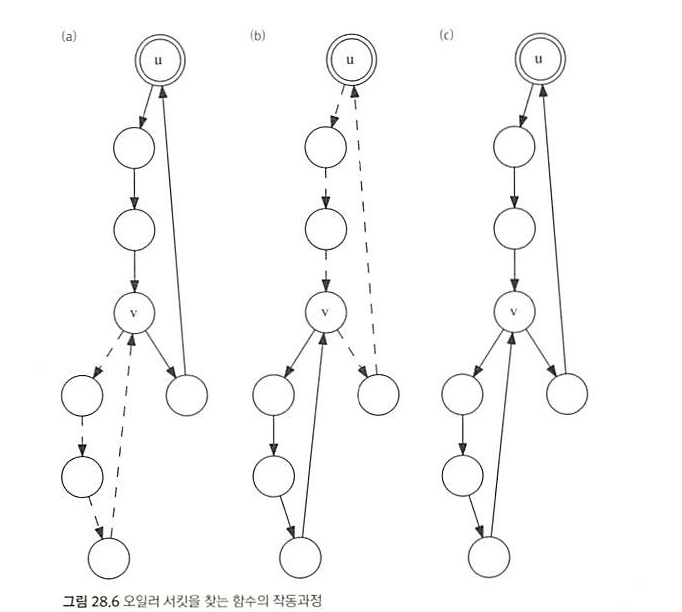

> **오일러 트레일** 이란 오일러 서킷처럼 그래프의 모든 간선을 정확히 한 번씩만 지나지만, 시작점과 끝 점이 다른 경로일 때를 의미한다. 만약 점 a에서 시작해서 b에서 끝나는 오일러 트레일에 간선 (b,a)가 된다. 즉 반대로 오일러 서킷에서 간선(b,a)를 빼면 오일러 트레일이 된다. **주어진 그래프에서 오일러 트레일을 찾는 문제는 오일러 서킷을 찾는 문제로 변환할 수 있다**

### 28.5-6 단어 제한 끝말잇기

In [7]:
import numpy as np
import string
import pandas as pd
def makeGraph(words):
    """
   그래프의 인접 행렬 표현으로 adj[i][j] = i와 j사이의 간선수
   graph[i][j]i로 시작해서 j로 끝나는 단어 목록
   indegree[i] = i로 시작하는 단어의 수
   outdegree[i] = i로 끝나는 단어의 수 
    """
    global adj; global graph; global indegree; global outdegree
    adj = np.zeros((26,26)); graph = pd.DataFrame(index = np.arange(26), columns = np.arange(26)); 
    graph.astype(str)
    indegree = np.zeros(26); outdegree = np.zeros(26)
    alphabet = string.ascii_lowercase
    for i in range(len(words)):
        a = alphabet.index(words[i][0])
        b = alphabet.index(words[i][len(words[i])-1])
        # 각 단어의 시작과 끝의 인덱스(0~25) a,b로 표현
        graph[a][b] = words[i]
        # 각 위치에 단어를 저장
        adj[a][b] += 1
        #  해당 위치에 간선 1개 추가
        outdegree[a] += 1
        indegree[b] += 1

In [8]:
def getEulerCircuit(here, circuit):
    """
    유향 그래프의 인접행렬 adj가 주어질 때 오일러 서킷 혹은 트레일을 계산하는 함수
    """
    for there in range(len(adj)):
        while adj[here][there] > 0:
            adj[here][there] = 0
            getEulerCircuit(there,circuit)
    circuit.append(here)
    # 한 번다 순회가 끝날때까지 append해서 circuit에 추가

def getEulerTrailOrCircuit():
    global circuit; circuit = []
    for i in range(26):
        # 트레일을 찾는 과정: 시작점을 부여
        if outdegree[i] == indegree[i]+1:
            # 나가는 차수가 하나 더 많을때 (트레일)
            getEulerCircuit(i, circuit)
            return circuit
    for i in range(26):
        # 아니면 서킷이니, 간선에 인접한 아무 정점에서 시작
        if outdegree[i] !=0 :
            getEulerCircuit(i,circuit)
            return circuit
    return circuit

In [9]:
def checkEuler():
    """
    현재 그래프의 오일러 서킷/토레일 존재 여부를 확인하는 함수
    plus1, minus1을 통해 예비 시작점과 끝점의 수를 지정
    """
    plus1 = 0; minus1 = 0
    for i in range(26):
        delta = outdegree[i] - indegree[i]
        # 모든 정점의 차수는 -1,1 또는 0이어야 한다.
        if (delta < -1) or (delta >1):
            return False
        if delta == 1:
            plus1 += 1
        if delta == -1:
            minus1 += 1
        # 시작점과 끝점은 각 하나씩 있거나 하나도 없어야 한다.
    return (plus1 ==1 and minus1 ==1) or (plus1 == 0 and minus1 ==0)
#트레인 or 서킷

def solve(words):
    makeGraph(words)
    # 차수가 맞지 않으면 실패
    if checkEuler() != True:
        return 'IMPOSSIBLE' 
    # 오일러 서킷이나 경로를 찾아낸다.
    # 모든 간선을 방문하지 못했으면 실패
    circuit = getEulerTrailOrCircuit()
    if len(circuit) != len(words)+1:
        return 'IMPOSSIBLE' 
  
    # 아닌 경우 방문 순서를 뒤집은 뒤 간선들을 모아 문자열로 만들어 반환
    circuit = circuit[::-1]
    ret = ''
    for i in range(1, len(circuit)):
        a = circuit[i-1]; b = circuit[i]
        if len(ret):
            ret += ' '
    # ret에 해당 단어 추가
        ret += graph[a][b]
        graph[a][b] = ''
    return ret

In [15]:
#a = ['dragon','need','dog','god']
#a = ['aa','ab','bb']
a = ['ab','cd']
solve(a)

'IMPOSSIBLE'